# Reducing Bias in Machine Learning Models - Data Cleaning

#### Kristen Lo - BrainStation
---

### Table of Contents
- [Introduction](#intro)
- [Part 0: Cleaning the Data](#clean)
    - 1.1: [Housekeeping](#housekeeping)
    - 1.2: [Deleting Columns](#col)
    - 1.3: [Deleting Rows](#rows)
    - 1.4: [Handling Duplicates](#duplicates)
    - 1.5: [Data Type Conversion](#type)
    - 1.6: [Handling Missing Data](#missing) 
    - 1.7: [Categorizing Columns](#cat) 
- [Conclusion](#conc)


---
### <a id = 'intro'></a> Introduction

In this notebook, we will be cleaning the data received so that it can be ready for further analysis.

There is a need to be able to predict the hospital admission rates for diabetic patients. However, using traditional machine learning models can lead to health disparities caused by biased data which can be related to demographic data (ex. race, age, income, insurance etc). These biases need to be removed prior to modelling so that bias isn't introduced into the model. Building on the work of Raza, S. who aimed to predict, diagnose, and mitigate health disparities in hospital re-admission, my aim is to replicate the study performed by Raza and create my own model that's able to screen for biases and predict admission rates for diabetics visiting the ER. 


Data was sourced from all adult Emergency Department visits from March 2014 - July 2017 from one academic and two community emergency rooms, apart from the Yale New Haven Health system. These visits resulted in either admission to their respective hospital or discharge. 

There are a total of 972 variables that we extracted per patient visit from 560,486 patient visits. 

Courtesy of:
 "Hong WS, Haimovich AD, Taylor RA (2018) Predicting hospital admission at emergency department triage using machine learning. PLoS ONE 13(7): e0201016." (https://doi.org/10.1371/journal.pone.0201016)




-----

## <a id = 'clean'></a> Part 0: Cleaning the Data

---
#### <a id = 'housekeeping'></a> 1.1 HouseKeeping 

For housekeeping, we will import all necessary libraries and upload the data. In addition we will look at the data set from a very high level view. We want to know generally what we are working with and to familiarize ourself with the data before we start cleaning. 

Plan of attack: 
- Import libraries needed and import the file 
- View the data and find out it's shape 
- Understand unique entries to the columns 

Importing all necessary libraries

In [ ]:
!pip install pyreadr -q
import pandas as pd
import pyreadr
import numpy as np
import matplotlib.pyplot as plt

The dataset is stored as an .rdata file, let's import it so cleaning can begin. The relative path won't work so the full path is needed. 

In [ ]:
result = pyreadr.read_r('Data/5v_cleandf.rdata')

Let's take a quick look at our data to see what we are working with.

In [405]:
raw_data = result['df']

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)

raw_data.head(10)

dep_name esi age  gender           ethnicity  \
0        B   4  40    Male  Hispanic or Latino   
1        B   4  66    Male  Hispanic or Latino   
2        B   2  66    Male  Hispanic or Latino   
3        A   2  66    Male  Hispanic or Latino   
4        A   3  84  Female  Hispanic or Latino   
5        A   3  86  Female  Hispanic or Latino   
6        A   3  86  Female  Hispanic or Latino   
7        A   4  87  Female  Hispanic or Latino   
8        B   2  75    Male        Non-Hispanic   
9        B   2  75    Male        Non-Hispanic   

                                        race     lang     religion  \
0                         White or Caucasian  English         None   
1  Native Hawaiian or Other Pacific Islander  English  Pentecostal   
2  Native Hawaiian or Other Pacific Islander  English  Pentecostal   
3  Native Hawaiian or Other Pacific Islander  English  Pentecostal   
4                                      Other    Other  Pentecostal   
5                                      Other    Other  Pentecostal   
6                                      Other    Other  Pentecostal   
7                                      Other    Other  Pentecostal   
8                         White or Caucasian  English         None   
9                         White or Caucasian  English         None   

  maritalstatus  employstatus insurance_status disposition arrivalmode  \
0        Single     Full Time            Other   Discharge     Walk-in   
1       Married  Not Employed       Commercial   Discharge         Car   
2       Married  Not Employed       Commercial   Discharge     Walk-in   
3       Married  Not Employed       Commercial   Discharge         Car   
4       Widowed       Retired         Medicare       Admit     Walk-in   
5       Widowed       Retired         Medicare   Discharge     Walk-in   
6       Widowed       Retired         Medicare       Admit         Car   
7       Widowed       Retired         Medicare   Discharge         Car   
8       Married       Retired         Medicare       Admit   ambulance   
9       Married       Retired         Medicare       Admit   ambulance   

  arrivalmonth arrivalday arrivalhour_bin      previousdispo  2ndarymalig  \
0         June    Tuesday           23-02  No previous dispo          0.0   
1      January    Tuesday           15-18  No previous dispo          0.0   
2         July   Thursday           11-14          Discharge          0.0   
3         July   Saturday           11-14          Discharge          0.0   
4     November    Tuesday           07-10          Discharge          0.0   
5        April     Monday           15-18              Admit          0.0   
6    September  Wednesday           11-14          Discharge          0.0   
7        March   Saturday           11-14              Admit          0.0   
8        March     Sunday           03-06              Admit          0.0   
9      October     Sunday           15-18              Admit          0.0   

   abdomhernia  abdomnlpain  abortcompl  acqfootdef  acrenlfail  acutecvd  \
0          0.0          0.0         0.0         0.0         0.0       0.0   
1          0.0          0.0         0.0         0.0         0.0       0.0   
2          0.0          0.0         0.0         0.0         0.0       0.0   
3          0.0          0.0         0.0         0.0         0.0       0.0   
4          0.0          0.0         0.0         0.0         0.0       0.0   
5          0.0          0.0         0.0         0.0         0.0       0.0   
6          0.0          0.0         0.0         0.0         0.0       0.0   
7          0.0          0.0         0.0         0.0         0.0       0.0   
8          0.0          0.0         0.0         0.0         0.0       0.0   
9          0.0          0.0         0.0         0.0         0.0       0.0   

   acutemi  acutphanm  adjustmentdisorders  adltrespfl  \
0      0.0        0.0                  0.0         0.0   
1      0.0        0.0                  0.0         0.

Looking at the data dictionary, we can see that columns are grouped into the following distinct categories: 
- `Demographics`: All demographic data related to patient
- `Triage Variables`: All vital signs recorded by the triage nurse
- `Hospital Usage`: How often the patient used the hospital, prior surgeries or hospitalizations
- `Chief Complaint`: What they visited the ER for
- `Past Medical History ` : Pre-existing conditions of patients
- `Outpatient Medications` : Number of outpatient medications taken divided up by type. 
- `Imaging` : Number of imaging procedures within one year of the current visit.
- `Historical Labs (Numberic)`: The last min, max, and median recorded value of all vitals taken in the ED within one year of the current visit 
- `Historical Labs (Categorical)` : The last value, number of positive results, and the total number of tests ordered for selected categorical labs ordered in the ED within one year of the current visit 

In [406]:
raw_data.size #to find out the number of rows 

544792392

In [407]:
raw_data.shape[1] #to find out the number of columns

972

As we can see, our data frame is 927 columns and ~550k rows. 


---
#### <a id = 'col'></a> 1.2 Deleting Columns

In order to create a useable data set to be used to predict the outcomes for diabetic patients, they first need to be isolated. From looking at the data dictionary, those who have 'diabmelnoc' and 'diabmelwcm' have a prior medical history of diabetes. Those who are visiting with the chief complaint of 'hyperglycemia' could possibly be diabetic as well. 

Here is the proposed plan of attack: 
- Create a new data frame that only contains the data of those with diabetes

First, let's isolate those that are positive for diabetes

In [408]:
#Filter rows that are positive for the condition
filtered_rows = raw_data[(raw_data['cc_hyperglycemia'] == 1) | (raw_data['diabmelnoc'] == 1) | (raw_data['diabmelwcm'] == 1)]

In [409]:
#Concatenate the filtered rows into a new DataFrame
health_data = pd.concat([filtered_rows])

In [410]:
health_data.head(5)

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,disposition,arrivalmode,arrivalmonth,arrivalday,arrivalhour_bin,previousdispo,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,acutphanm,adjustmentdisorders,adltrespfl,alcoholrelateddisorders,allergy,amniosdx,analrectal,anemia,aneurysm,anxietydisorders,appendicitis,artembolism,asppneumon,asthma,attentiondeficitconductdisruptivebeha,backproblem,biliarydx,birthasphyx,birthtrauma,bladdercncr,blindness,bnignutneo,bonectcncr,bph,brainnscan,breastcancr,breastdx,brnchlngca,bronchitis,burns,cardiaarrst,cardiacanom,carditis,cataract,cervixcancr,chestpain,chfnonhp,chrkidneydisease,coaghemrdx,coloncancer,comabrndmg,complicdevi,complicproc,conduction,contraceptiv,copd,coronathero,crushinjury,cysticfibro,deliriumdementiaamnesticothercognitiv,developmentaldisorders,diabmelnoc,diabmelwcm,disordersusuallydiagnosedininfancych,diverticulos,dizziness,dminpreg,dysrhythmia,earlylabor,ecodesadverseeffectsofmedicalcare,ecodesadverseeffectsofmedicaldrugs,ecodescutpierce,ecodesdrowningsubmersion,ecodesfall,ecodesfirearm,ecodesfireburn,ecodesmachinery,ecodesmotorvehicletrafficmvt,ecodesnaturalenvironment,ecodesotherspecifiedandclassifiable,ecodesotherspecifiednec,ecodespedalcyclistnotmvt,ecodesplaceofoccurrence,ecodespoisoning,ecodesstruckbyagainst,ecodessuffocation,ecodestransportnotmvt,ecodesunspecified,ectopicpreg,encephalitis,endometrios,epilepsycnv,esophcancer,esophgealdx,exameval,eyeinfectn,fatigue,femgenitca,feminfertil,fetaldistrs,fluidelcdx,fuo,fxarm,fxhip,fxleg,fxskullfac,gangrene,gasduoulcer,gastritis,gastroent,giconganom,gihemorrhag,giperitcan,glaucoma,goutotcrys,guconganom,hdnckcancr,headachemig,hemmorhoids,hemorrpreg,hepatitis,hivinfectn,hodgkinsds,hrtvalvedx,htn,htncomplicn,htninpreg,hyperlipidem,immunitydx,immunizscrn,impulsecontroldisordersnec,inducabortn,infectarth,influenza,infmalegen,intestinfct,intobstruct,intracrninj,jointinjury,kidnyrnlca,lateeffcvd,leukemias,liveborn,liveribdca,longpregncy,lowbirthwt,lungexternl,lymphenlarg,maintchemr,malgenitca,maligneopls,malposition,meningitis,menopausldx,menstrualdx,miscellaneousmentalhealthdisorders,mooddisorders,mouthdx,ms,multmyeloma,mycoses,nauseavomit,neoplsmunsp,nephritis,nervcongan,nonepithca,nonhodglym,nutritdefic,obrelatedperintrauma,opnwndextr,opnwndhead,osteoarthros,osteoporosis,otacqdefor,otaftercare,otbnignneo,otbonedx,otcirculdx,otcomplbir,otconganom,otconntiss,otdxbladdr,otdxkidney,otdxstomch,otendodsor,otfemalgen,othbactinf,othcnsinfx,othematldx,othercvd,othereardx,otheredcns,othereyedx,othergidx,othergudx,otherinjury,otherpregnancyanddeliveryincludingnormal,otherscreen,othfracture,othheartdx,othinfectns,othliverdx,othlowresp,othmalegen,othnervdx,othskindx,othveindx,otinflskin,otitismedia,otjointdx,otnutritdx,otperintdx,otpregcomp,otprimryca,otrespirca,otupprresp,otuprspin,ovariancyst,ovarycancer,pancreascan,pancreasdx,paralysis,parkinsons,pathologfx,pelvicobstr,perintjaund,peripathero,peritonitis,personalitydisorders,phlebitis,pid,pleurisy,pneumonia,poisnnonmed,poisnotmed,poisonpsych,precereoccl,prevcsectn,prolapse,prostatecan,pulmhartdx,rctmanusca,rehab,respdistres,retinaldx,rheumarth,schizophreniaandotherpsychoticdisorde,screeningandhistoryofmentalhealthan,septicemia,septicemiaexceptinlabor,sexualinfxs,shock,sicklecell,skininfectn,skinmelanom,sle,socialadmin,spincorinj,spontabortn,sprain,stomchcancr,substancerelateddisorders,suicideandintentionalselfinflictedin,superficinj,syncope,teethdx,testiscancr,thyroidcncr,thyroiddsor,tia,tonsillitis,tuberculosis,ulceratcol,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx,n_edvisits,n_admissions,absolutelymphocytecount_last,acetonebld_last,alanineaminotransferase(alt)_last,albumin_last,alkphos_last,anc(absneutrophilcount)_last,aniongap_last,aspartateaminotransferase(ast)_last,"b-typenatriureticpeptide,pro(probnp)_last",baseexcess(poc)_last,"baseex

Let's now look at the size of this data set. 

In [411]:
health_data.shape

(108567, 972)

We have a about 110k rows left, this is still a sizeable data set to use. Let's quickly take a look at the nulls that exist so that we can better inform our dropping column strategy.

In [412]:
health_data.isna().sum()/health_data.shape[0]*100

dep_name                                                0.000000
esi                                                     0.369357
age                                                     0.000000
gender                                                  0.000000
ethnicity                                               0.000000
race                                                    0.005527
lang                                                    0.000000
religion                                                0.000000
maritalstatus                                           0.000000
employstatus                                            0.000000
insurance_status                                        0.000000
disposition                                             0.000000
arrivalmode                                             2.013503
arrivalmonth                                            0.000000
arrivalday                                              0.000000
arrivalhour_bin          

As we can see, there are a few nulls that that exist throughout the data. In particular, there is a large percentage of missing values in the `triage vital` super column and the `historical labs`. I am only going to keep the esi and the arrival month. 

As for the `Historical Labs`, I believe that it's necessary to keep the median glucose reading as this will be our gage. I will impute the missing values based on the average reading for the age group who also have diabetes. I will also include a column to indicate whether or not these values were imputed.

----
As indicated earlier, there are super-categories that these columns belong to. Some of them are labelled accordingly and some aren't. For instance, `chief complaint` columns are preceded by cc_. I will to these for the `Demographic` (demo_), `Triage Variables` (I will split it into categorical triage_cat_), `Hospital Usage` (huse_), and  `Past Medical History`(pmh_). This way it will be easier to group down the road.

Let's start with altering the `Demographic` columns.

In [413]:
demo_col = ['age','gender','ethnicity','race','lang','religion','maritalstatus','employstatus','insurance_status']

In [414]:
#Create a dictionary to map the new column names
column_name_mapping = {col: 'demo_' + col for col in demo_col}

In [415]:
# Rename the columns in the DataFrame
health_data = health_data.rename(columns=column_name_mapping)

Now, the's alter the `Triage Variables` that are categorical in nature by adding triage_cat_ to the beginning. 

In [416]:
tri_cat = ['dep_name','arrivalmode', 'arrivalmonth', 'arrivalday', 'arrivalhour_bin', 'esi']

In [417]:
#Create a dictionary to map the new column names
column_name_mapping = {col: 'triage_cat_' + col for col in tri_cat}

In [418]:
# Rename the columns in the DataFrame
health_data = health_data.rename(columns=column_name_mapping)

Now, the's alter the `Hospital Usage`  by adding huse_ to the beginning. 

In [419]:
hos_use = ['previousdispo', 'n_edvisits', 'n_admissions', 'n_surgeries']

In [420]:
#Create a dictionary to map the new column names
column_name_mapping = {col: 'huse_' + col for col in hos_use}

In [421]:
# Rename the columns in the DataFrame
health_data = health_data.rename(columns=column_name_mapping)

Now, the's alter the `Past Medical History`  by adding pmh_ to the beginning. 

In [422]:
pmh_col = [
    '2ndarymalig', 'abdomhernia', 'abdomnlpain', 'abortcompl', 'acqfootdef',
    'acrenlfail', 'acutecvd', 'acutemi', 'acutphanm', 'adjustmentdisorders',
    'adltrespfl', 'alcoholrelateddisorders', 'allergy', 'amniosdx',
    'analrectal', 'anemia', 'aneurysm', 'anxietydisorders', 'appendicitis',
    'artembolism', 'asppneumon', 'asthma', 'attentiondeficitconductdisruptivebeha',
    'backproblem', 'biliarydx', 'birthasphyx', 'birthtrauma', 'bladdercncr',
    'blindness', 'bnignutneo', 'bonectcncr', 'bph', 'brainnscan',
    'breastcancr', 'breastdx', 'brnchlngca', 'bronchitis', 'burns',
    'cardiaarrst', 'cardiacanom', 'carditis', 'cataract', 'cervixcancr',
    'chestpain', 'chfnonhp', 'chrkidneydisease', 'coaghemrdx', 'coloncancer',
    'comabrndmg', 'complicdevi', 'complicproc', 'conduction', 'contraceptiv',
    'copd', 'coronathero', 'crushinjury', 'cysticfibro', 'deliriumdementiaamnesticothercognitiv',
    'developmentaldisorders', 'diabmelnoc', 'diabmelwcm', 'disordersusuallydiagnosedininfancych',
    'diverticulos', 'dizziness', 'dminpreg', 'dysrhythmia', 'earlylabor',
    'ecodesadverseeffectsofmedicalcare', 'ecodesadverseeffectsofmedicaldrugs', 'ecodescutpierce',
    'ecodesdrowningsubmersion', 'ecodesfall', 'ecodesfirearm', 'ecodesfireburn', 'ecodesmachinery',
    'ecodesmotorvehicletrafficmvt', 'ecodesnaturalenvironment', 'ecodesotherspecifiedandclassifiable',
    'ecodesotherspecifiednec', 'ecodespedalcyclistnotmvt', 'ecodesplaceofoccurrence', 'ecodespoisoning',
    'ecodesstruckbyagainst', 'ecodessuffocation', 'ecodestransportnotmvt', 'ecodesunspecified', 'ectopicpreg',
    'encephalitis', 'endometrios', 'epilepsycnv', 'esophcancer', 'esophgealdx',
    'exameval', 'eyeinfectn', 'fatigue', 'femgenitca', 'feminfertil', 'fetaldistrs',
    'fluidelcdx', 'fuo', 'fxarm', 'fxhip', 'fxleg', 'fxskullfac', 'gangrene',
    'gasduoulcer', 'gastritis', 'gastroent', 'giconganom', 'gihemorrhag', 'giperitcan',
    'glaucoma', 'goutotcrys', 'guconganom', 'hdnckcancr', 'headachemig', 'hemmorhoids',
    'hemorrpreg', 'hepatitis', 'hivinfectn', 'hodgkinsds', 'hrtvalvedx', 'htn',
    'htncomplicn', 'htninpreg', 'hyperlipidem', 'immunitydx', 'immunizscrn',
    'impulsecontroldisordersnec', 'inducabortn', 'infectarth', 'influenza', 'infmalegen',
    'intestinfct', 'intobstruct', 'intracrninj', 'jointinjury', 'kidnyrnlca',
    'lateeffcvd', 'leukemias', 'liveborn', 'liveribdca', 'longpregncy', 'lowbirthwt',
    'lungexternl', 'lymphenlarg', 'maintchemr', 'malgenitca', 'maligneopls', 'malposition',
    'meningitis', 'menopausldx', 'menstrualdx', 'miscellaneousmentalhealthdisorders',
    'mooddisorders', 'mouthdx', 'ms', 'multmyeloma', 'mycoses', 'nauseavomit',
    'neoplsmunsp', 'nephritis', 'nervcongan', 'nonepithca', 'nonhodglym', 'nutritdefic',
    'obrelatedperintrauma', 'opnwndextr', 'opnwndhead', 'osteoarthros', 'osteoporosis',
    'otacqdefor', 'otaftercare', 'otbnignneo', 'otbonedx', 'otcirculdx', 'otcomplbir',
    'otconganom', 'otconntiss', 'otdxbladdr', 'otdxkidney', 'otdxstomch', 'otendodsor',
    'otfemalgen', 'othbactinf', 'othcnsinfx', 'othematldx', 'othercvd', 'othereardx',
    'otherecns', 'othereyedx', 'othergidx', 'othergudx', 'otherinjury', 'otherpregnancyanddeliveryincludingnormal',
    'otherscreen', 'othfracture', 'othheartdx', 'othinfectns', 'othliverdx', 'othlowresp',
    'othmalegen', 'othnervdx', 'othskindx', 'othveindx', 'otinflskin', 'otitismedia',
    'otjointdx', 'otnutritdx', 'otperintdx', 'otpregcomp', 'otprimryca', 'otrespirca',
    'otupprresp', 'otuprspin', 'ovariancyst', 'ovarycancer', 'pancreascan', 'pancreasdx',
    'paralysis', 'parkinsons', 'pathologfx', 'pelvicobstr', 'perintjaund', 'peripathero',
    'peritonitis', 'personalitydisorders', 'phlebitis', 'pid', 'pleurisy', 'pneumonia',
    'poisnnonmed', 'poisnotmed', 'poisonpsych', 'precereoccl', 'prevcsectn', 'prolapse',
    'prostatecan', 'pulmhartdx', 'rctmanusca', 'rehab', 'respdistres', 'retinaldx', 'rheumarth',
    'schizophreniaandotherpsychoticdisorde', 'screeningandhistoryofmentalhealthan',
    'septicemia', 'septicemiaexceptinlabor', 'sexualinfxs', 'shock', 'sicklecell',
    'skininfectn', 'skinmelanom', 'sle', 'socialadmin', 'spincorinj', 'spontabortn',
    'sprain', 'stomchcancr', 'substancerelateddisorders', 'suicideandintentionalselfinflictedin',
    'superficinj', 'syncope', 'teethdx', 'testiscancr', 'thyroidcncr', 'thyroiddsor',
    'tia', 'tonsillitis', 'tuberculosis', 'ulceratcol', 'ulcerskin', 'umbilcord',
    'unclassified', 'urinstone', 'urinyorgca', 'uteruscancr', 'uti', 'varicosevn',
    'viralinfect', 'whtblooddx', 'otheredcns '
]


In [423]:
#Create a dictionary to map the new column names
column_name_mapping = {col: 'pmh_' + col for col in pmh_col}

In [424]:
# Rename the columns in the DataFrame
health_data = health_data.rename(columns=column_name_mapping)

Though I eventually plan to drop many columns from the `Historical Labs (Numerical)` and `Hisotircal Labs (Categorical)`, I still plan to group them together. This is because I need to isolate the columns of interest for glucose labs down the road and only want to make alterations to this data rather than the entire data frame. By using '_count', I will also be isolating the `imaging` super category with this union. This is fine as I intend to drop that supercategory due to lack of domain expertise.

In [425]:
#Create a filter to isolate the columns of interest
hist_labs = health_data.filter(like='_max').columns.union(
    health_data.filter(like='_last').columns).union(
    health_data.filter(like='_min').columns).union(
    health_data.filter(like='_npos').columns).union(
    health_data.filter(like='_count').columns).union(
    health_data.filter(like='_median').columns)

In [426]:
#Create a dictionary to map the new column names
column_name_mapping = {col: 'hist_' + col for col in hist_labs}

Let's check to make sure all the right alterations have been made. 

In [427]:
# Rename the columns in the DataFrame
health_data = health_data.rename(columns=column_name_mapping)

In [428]:
health_data.columns.tolist()

['triage_cat_dep_name',
 'triage_cat_esi',
 'demo_age',
 'demo_gender',
 'demo_ethnicity',
 'demo_race',
 'demo_lang',
 'demo_religion',
 'demo_maritalstatus',
 'demo_employstatus',
 'demo_insurance_status',
 'disposition',
 'triage_cat_arrivalmode',
 'triage_cat_arrivalmonth',
 'triage_cat_arrivalday',
 'triage_cat_arrivalhour_bin',
 'huse_previousdispo',
 'pmh_2ndarymalig',
 'pmh_abdomhernia',
 'pmh_abdomnlpain',
 'pmh_abortcompl',
 'pmh_acqfootdef',
 'pmh_acrenlfail',
 'pmh_acutecvd',
 'pmh_acutemi',
 'pmh_acutphanm',
 'pmh_adjustmentdisorders',
 'pmh_adltrespfl',
 'pmh_alcoholrelateddisorders',
 'pmh_allergy',
 'pmh_amniosdx',
 'pmh_analrectal',
 'pmh_anemia',
 'pmh_aneurysm',
 'pmh_anxietydisorders',
 'pmh_appendicitis',
 'pmh_artembolism',
 'pmh_asppneumon',
 'pmh_asthma',
 'pmh_attentiondeficitconductdisruptivebeha',
 'pmh_backproblem',
 'pmh_biliarydx',
 'pmh_birthasphyx',
 'pmh_birthtrauma',
 'pmh_bladdercncr',
 'pmh_blindness',
 'pmh_bnignutneo',
 'pmh_bonectcncr',
 'pmh_bph'

---
I want to be able to keep as much information as I can from the original data set, as the diabetic patients can have other prior medical history and chief complaints as well. I feel as though these are important to keep intact as some could comorbid with diabetes. I will search through the `chief complaint`, `prior medical history`,and `medication` columns and look for any columns that have 0% occurrence and drop those.

In [429]:
#Identifying the columns that are in the chief complaint and prior medical history column
chief_complaint = health_data.filter(like='cc_').columns
prior_medical_history =  health_data.filter(like='pmh_').columns
medication = health_data.filter(like='meds_').columns

In [430]:
# Combine both sets of columns
all_columns = chief_complaint.union(prior_medical_history)

# Calculate the percentage of occurrence for each column
occurrence_percentages = (health_data[all_columns].sum() / len(health_data)) * 100

# Filter columns with 0% occurrence
columns_with_zero_occurrence = occurrence_percentages[occurrence_percentages == 0].index

# Display the columns with 0% occurrence
print("Columns with 0% occurrence:")
print(columns_with_zero_occurrence)

Columns with 0% occurrence:
Index(['pmh_abortcompl', 'pmh_birthasphyx', 'pmh_ecodesdrowningsubmersion',
       'pmh_ecodesfireburn', 'pmh_ecodesmachinery',
       'pmh_ecodesnaturalenvironment', 'pmh_ecodespedalcyclistnotmvt',
       'pmh_ecodesplaceofoccurrence', 'pmh_ecodespoisoning',
       'pmh_ecodessuffocation', 'pmh_longpregncy', 'pmh_malposition',
       'pmh_perintjaund', 'pmh_septicemiaexceptinlabor'],
      dtype='object')


As we can see, the above columns have 0% occurrence so these will be removed accordingly. I am curious about the range of percentage occurrence. It should be very high for the columns noted as indicating diabetes. 

In [431]:
# Find the column with the maximum occurrence
max_occurrence_column = occurrence_percentages.idxmax()

# Display the column with the maximum occurrence
print("Column with the Maximum Occurrence:")
print(max_occurrence_column)

Column with the Maximum Occurrence:
pmh_diabmelnoc


In [432]:
#Isolate the columns with 0% occurrences. 
col_to_drop = ['pmh_abortcompl', 'pmh_birthasphyx', 'pmh_ecodesdrowningsubmersion',
       'pmh_ecodesfireburn', 'pmh_ecodesmachinery',
       'pmh_ecodesnaturalenvironment', 'pmh_ecodespedalcyclistnotmvt',
       'pmh_ecodesplaceofoccurrence', 'pmh_ecodespoisoning',
       'pmh_ecodessuffocation', 'pmh_longpregncy', 'pmh_malposition',
       'pmh_perintjaund', 'pmh_septicemiaexceptinlabor']

In [433]:
# Drop the columns 
health_data = health_data.drop(columns=col_to_drop)

----
 The columns `ethnicity` and `race` can be combined into the `race` column. We will do this before dropping the `ethnicity` column.

I noticed that for the `ethnicity` and `race` rows that if a patient identifies as 'Hispanic or Latino' in the `ethnicity` column then in the `race` column, they are labeled as 'other'. I will write a lambda function that replaces 'other' with 'Hispanic or latino' in the `race` column if they write 'Hispanic or Latino' in the `ethnicity` column


In [434]:
health_data['demo_race'] = health_data.apply(lambda row: 'Hispanic or Latino' if row['demo_ethnicity'] == 'Hispanic or Latino' else row['demo_race'], axis=1)

Let's make sure that all of the data from the `ethnicity` column has been ported into the `race` column. I'll do this by creating a value_count of the race row.

In [435]:
health_data['demo_race'].value_counts()

demo_race
White or Caucasian                           51384
Black or African American                    34501
Hispanic or Latino                           19526
Other                                         1822
Asian                                          662
Patient Refused                                327
Unknown                                        176
American Indian or Alaska Native               104
Native Hawaiian or Other Pacific Islander       59
Name: count, dtype: int64

The two columns have been successfully merged.  Now, let's drop the redundant `ethnicity` column. 

In [436]:
#Drop the column
health_data = health_data.drop(columns='demo_ethnicity')

----
The only demographic data that I would be interested would be the following:
- Age, gender, race, employ status, insurance_status

The only column that isn't included is demo_maritalstatus, demo_lang, and demo_religion. So I will drop these columns.

In [437]:
col_to_drop = ['demo_maritalstatus','demo_lang','demo_religion']

In [438]:
#Drop the column
health_data = health_data.drop(columns=col_to_drop)

---
The columns `triage_vital_o2_device` and `triage_vital_o2` will be dropped. The former indicates whether or not the ED had a supplementary oxygen device and the latter indicates oxygen saturation. I am dropping these columns as they have a high rate of nulls (40% - 48%). These values cannot be easily imputed. 

The columns `arrivalhour_bin` and `arrivalday`, we do not the arrival time for our analysis and the arrival day only indicates the day of the week and not hte actual date. We can just keep analysis high level to the `arrivalmonth` if we need. 

In [439]:
# Define the columns to be dropped
col_drop = [
    'triage_vital_o2_device', 'triage_vital_o2',
    'triage_cat_arrivalhour_bin', 'triage_cat_arrivalday', 'triage_cat_arrivalmode',
    'triage_cat_dep_name'
]
# Drop the columns 
health_data = health_data.drop(columns=col_drop)

---
In addition, I will drop the `Historical Labs (Numerical)` and `Historical Labs (Numerical)` that are not needed. The columns that are needed are the following:
- glucose_median - glucose levels in blood work. 

In [440]:
#Isolate the historical labs
historical_labs = health_data.filter(like='hist_').columns

In [441]:
# Specify the columns to keep
columns_to_keep = [
    'hist_glucose_median'

]

# Create a separate data frame to store this data
health_data_filtered = health_data[columns_to_keep]

I will now drop historical_labs from the original data frame, then merge back the health_data_filtered. 

In [442]:
#Drop the columns isolated
health_data = health_data.drop(columns=historical_labs)

I will concatenate the filtered data to the original data frame.

In [443]:
# Concatenate the filtered data with the original data along the columns axis
health_data = pd.concat([health_data, health_data_filtered], axis=1)

In [444]:
historical_labs = health_data.filter(like='hist_').columns
print(f'The columns that make up the super category are : {historical_labs}')

The columns that make up the super category are : Index(['hist_glucose_median'], dtype='object')


Now let's look at what our current data frame looks like.

In [445]:
health_data.shape[1]

533

---
#### <a id = 'rows'></a> 1.3 Deleting Rows

Before we can start, let's understand what lives inside of our columns that we have remaining

In [446]:
#Writing a loop to retireve all unique values for all of the columns
for column in health_data.columns:
    unique_vals = health_data[column].unique()
    print(f'Unique values in {column}: {unique_vals}')

Unique values in triage_cat_esi: ['3', '4', '2', '1', '5', NaN]
Categories (5, object): ['1', '2', '3', '4', '5']
Unique values in demo_age: [86 87 53 33 49 50 51 45 46 35 56 55 48 64 65 66 67 47 42 63 61 62 70 71
 72 39 41 75 73 60 44 58 88 84 85 59 27 76 74 80 81 40 77 69 52 83 89 57
 36 37 23 68 54 96 82 95 79 38 78 93 97 91 92 94 19 34 26 28 25 90 43 99
 98 100 29 31 32 22 18 24 30 20 21 102 101 103 104 106 105]
Unique values in demo_gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Unique values in demo_race: ['Hispanic or Latino' 'White or Caucasian' 'Black or African American'
 'Other' 'Patient Refused' 'Asian'
 'Native Hawaiian or Other Pacific Islander' 'Unknown'
 'American Indian or Alaska Native' nan]
Unique values in demo_employstatus: ['Retired', 'Disabled', 'Full Time', 'Not Employed', 'Part Time', 'Self Employed', 'Student - Full Time', 'Unknown', 'On Active Military Duty', 'Student - Part Time']
Categories (10, object): ['Disabled', 'Full Time', 'Not

From what we can see, there are already null values that exist within the data set. Let's look at the percentage of nulls per column. 

In [447]:
#This will show the percentage of null values per column
health_data.isna().sum()/health_data.shape[0]*100

triage_cat_esi                                         0.369357
demo_age                                               0.000000
demo_gender                                            0.000000
demo_race                                              0.005527
demo_employstatus                                      0.000000
demo_insurance_status                                  0.000000
disposition                                            0.000000
triage_cat_arrivalmonth                                0.000000
huse_previousdispo                                     0.000000
pmh_2ndarymalig                                        0.000000
pmh_abdomhernia                                        0.000000
pmh_abdomnlpain                                        0.000000
pmh_acqfootdef                                         0.000000
pmh_acrenlfail                                         0.000000
pmh_acutecvd                                           0.000000
pmh_acutemi                             

Plan of attack:
- Rows in the `race` column where it says 'Unknown','Patient Refused', or 'Other', as these do not provide the demographic data that's needed. 
- Rows in the `employstatus` column that say 'Unknown' as these do not provide the demographic data that's needed. 


Let's first define the values to be dropped in each column, then create a loop to drop rows with the defined values.

In [448]:
health_data['demo_race'].value_counts()

demo_race
White or Caucasian                           51384
Black or African American                    34501
Hispanic or Latino                           19526
Other                                         1822
Asian                                          662
Patient Refused                                327
Unknown                                        176
American Indian or Alaska Native               104
Native Hawaiian or Other Pacific Islander       59
Name: count, dtype: int64

In [449]:
# Define the values to be dropped in each column
values_to_drop = {
    'demo_race': ['Unknown', 'Patient Refused', 'Other'],
    'demo_employstatus': ['Unknown']
    }
total_rows_before = len(health_data)
print(f"Total Rows Before Dropping: {total_rows_before}")

Total Rows Before Dropping: 108567


In [450]:
# A for loop to iterate through columns and drop rows with specified values
for column, drop_values in values_to_drop.items():
    health_data = health_data[~health_data[column].isin(drop_values)]

health_data.reset_index(drop=True, inplace=True) #reset the index as needed

In [451]:
total_rows_after = len(health_data)
print(f"Total Rows After Dropping: {total_rows_after}")


Total Rows After Dropping: 106126


In [452]:
columns_of_interest = ['demo_race','demo_employstatus']
for column in columns_of_interest:
    counts = health_data[column].value_counts()
    print(f"Value Counts for '{column}':\n{counts}")

Value Counts for 'demo_race':
demo_race
White or Caucasian                           51317
Black or African American                    34482
Hispanic or Latino                           19497
Asian                                          661
American Indian or Alaska Native               104
Native Hawaiian or Other Pacific Islander       59
Name: count, dtype: int64
Value Counts for 'demo_employstatus':
demo_employstatus
Retired                    42418
Not Employed               22542
Disabled                   21221
Full Time                  13361
Part Time                   4561
Self Employed               1549
Student - Full Time          404
Student - Part Time           66
On Active Military Duty        4
Unknown                        0
Name: count, dtype: int64


As seen above, we can see that the rows were removed properly. 

---
Let's look at the number of nulls.

In [453]:
health_data.isna().sum()/health_data.shape[0]*100

triage_cat_esi                                         0.369372
demo_age                                               0.000000
demo_gender                                            0.000000
demo_race                                              0.005654
demo_employstatus                                      0.000000
demo_insurance_status                                  0.000000
disposition                                            0.000000
triage_cat_arrivalmonth                                0.000000
huse_previousdispo                                     0.000000
pmh_2ndarymalig                                        0.000000
pmh_abdomhernia                                        0.000000
pmh_abdomnlpain                                        0.000000
pmh_acqfootdef                                         0.000000
pmh_acrenlfail                                         0.000000
pmh_acutecvd                                           0.000000
pmh_acutemi                             

In general we seem to have null values that range from 0.44% - 48%. The higher end of the null values exist in the triage vital columns, these are the vital signs recorded at intake. 

Plan of attack: 
  - Rows in the `ESI` column that have null values. The ESI score is a score assigned by the triage nurse, it would be difficult to impute. So I will drop these rows as these null rows are about 0.48% of Data 
  - Rows in the `Chief complaint columns` have a null percentage of about 0.46%. I will drop these rows as there is no way to impute these values. A patient either has a chief complaint  or they don't. In addition, these rows are meant to be binary and there is a 2 that comes up on occasion. I will assume that these were meant to go under 1 and merge this information. 
  - Rows in the  `race`, and `arrivalmode` have a null percentage of ranging 0.002% - 3.9%. I will drop these rows as there is no way to impute these values.
  ---

I will start with the null values that can be dropped simply.

In [454]:
health_data.dropna(subset='triage_cat_esi',inplace = True)
health_data.dropna(subset='demo_race',inplace = True)

---
Let's now remove the null values from the `Chief complaint columns`, these need to be aggregated. I noticed that cc_ precedes these columns, so I will isolate according to this.

In [455]:
cc_rows = health_data.filter(like='cc_').columns #this isolates the chief complain columns

health_data.dropna(subset = cc_rows, inplace=True)

---

Now let's look at the state of our data after removing these nulls. 

In [456]:
missing_percentage = health_data.isna().sum() / health_data.shape[0] * 100

In [457]:
with pd.option_context('display.max_rows', None): #I was having display issues only using the above code. This is my work around
    print(missing_percentage)

triage_cat_esi                                         0.000000
demo_age                                               0.000000
demo_gender                                            0.000000
demo_race                                              0.000000
demo_employstatus                                      0.000000
demo_insurance_status                                  0.000000
disposition                                            0.000000
triage_cat_arrivalmonth                                0.000000
huse_previousdispo                                     0.000000
pmh_2ndarymalig                                        0.000000
pmh_abdomhernia                                        0.000000
pmh_abdomnlpain                                        0.000000
pmh_acqfootdef                                         0.000000
pmh_acrenlfail                                         0.000000
pmh_acutecvd                                           0.000000
pmh_acutemi                             

All that remains is the `hist_glucose_median` that need to be imputed which will be done later on in our cleaning. 

---
#### <a id = 'duplicates'></a> 1.4 Handling Duplicates

Let look and see how many duplicated rows there might be. 

In [458]:
# Detecting duplicates
duplicates = health_data[health_data.duplicated()]

In [459]:
#Percentage of duplicated

(duplicates.shape[0])/health_data.shape[0] * 100

0.007600805685402653

The duplicated rows represent 0.064% of the total data set. Given that all columns match for these values, it's safe to say that these are truly duplicated rows. It's hard to believe that all columns are the same, even if it's repeated visit at least 1 variable should differ. Since these duplicated rows makes up 0.064% of the data set, I will be dropping them. 

In [460]:
health_data.drop_duplicates(inplace=True) #dropping the duplicates 

In [461]:
health_data.duplicated().sum() #confirming that the duplicates have been dropped

0

In [462]:
health_data = health_data.reset_index(drop=True) #reset the index

Now that we have dropped all duplicated rows and reset the index, let's move on to the next part of our cleaning.

---
#### <a id = 'type'></a> 1.5 Data Type Conversion

Disposition is a binary column, but it's still in text form. I will binarize the column as a step to clean the data. 

In [463]:
(health_data['disposition'].value_counts()/health_data['disposition'].count())*100

disposition
Discharge    53.989776
Admit        46.010224
Name: count, dtype: float64

As we can see, about 54% of all patients were discharged and 46% of all patients were admitted. Now let's binarize them. 

In [464]:
health_data['disposition'] = health_data['disposition'].map({'Admit': 1, 'Discharge': 0})
health_data['disposition'].value_counts()

disposition
0    56821
1    48423
Name: count, dtype: int64

This confirms that the `disposition` column has been successfully binarized. 

---
In addition, I noticed that some of the columns in `Chief Complaint` columns have a 2 or 3 as an input. These instances were few so I feel comfortable with dealing with them. I assume that these were meant to be a 1. I will map it accordingly so that all of the `chief_complaint` columns will be binary. 

In [465]:
# List of columns to update (columns that start with 'cc_')
columns_to_update = [col for col in health_data.columns if col.startswith('cc_')]

In [466]:
health_data[columns_to_update].max().value_counts()#let's see what the different values are.

1    179
2     20
3      1
Name: count, dtype: int64

In [467]:
# Loop through the selected columns and replace 2 with 1
for column in columns_to_update:
    health_data[column] = health_data[column].replace(2, 1).replace(3, 1)

In [468]:
health_data[columns_to_update].min().sum()

0

In [469]:
health_data[columns_to_update].max().value_counts()

1    200
Name: count, dtype: int64

The additional 2 and 3 input has been removed from the columns. 

---
#### <a id = 'missing'></a> 1.6 Handling Missing Data

As we indicated earlier, the historical labs for median glucose levels is missing for some patients. I will impute these based on age groups as all of the patient have diabetes. I will also include an imputed column to indicate whether or not this lab value was imputed so that it's weight can be taken into consideration down the road in modelling.

First, we must change the age column into appropriate age bins.

Find the min and max age and determine the size of 'age bins' we will use. 

In [470]:
# Find the minimum, maximum in age
min_age = health_data['demo_age'].min()
max_age = health_data['demo_age'].max()

# Display the results
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")

Minimum age: 18
Maximum age: 106


As we can see, age ranges from 18 - 108. We will use roughly 10 bins of 9 to classify age. So from ages '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109'. 


In [471]:
age_bins = [18, 29, 39, 49, 59, 69, 79, 89, 99, 109]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109']

Now let's update the age column with the appropriate categorical information. Effectively converting the numeric column to categorical. 

In [472]:
#Classify the age column
health_data['demo_age'] = pd.cut(health_data['demo_age'], bins=age_bins, labels=age_labels, right=False)

Let's confirm that column has been classified correctly and changed.

In [473]:
health_data['demo_age'].value_counts()

demo_age
50-59      23790
60-69      22145
70-79      17887
40-49      13038
80-89      12980
30-39       7377
90-99       4710
18-29       3182
100-109      135
Name: count, dtype: int64

---
Let's ensure that the  `Triage Variables` and `hist_glucose_median` are normally distributed first.

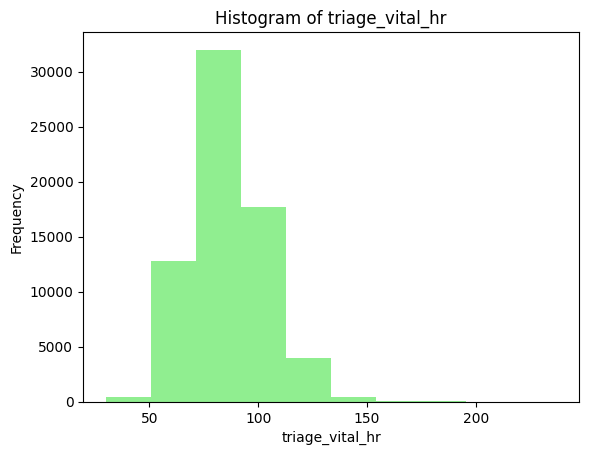

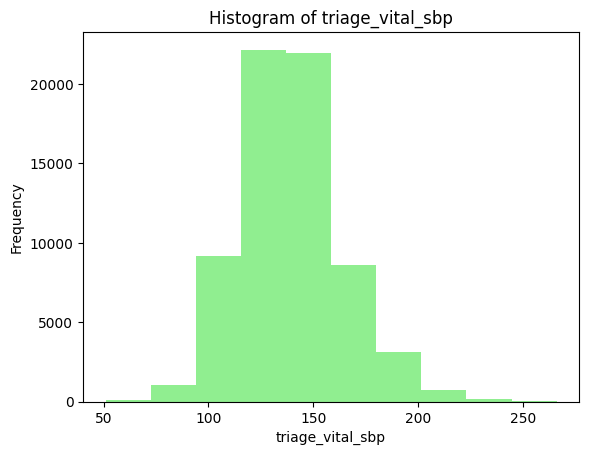

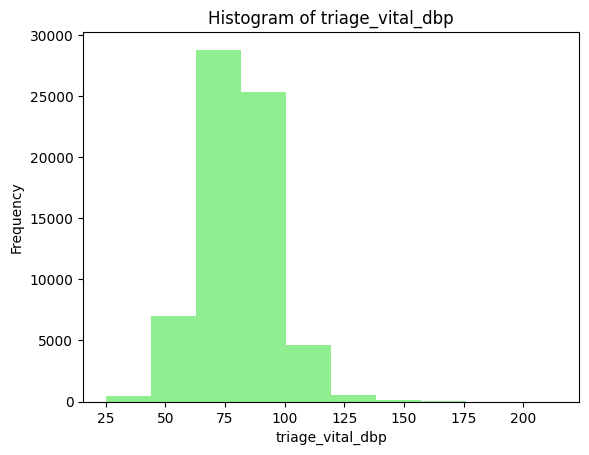

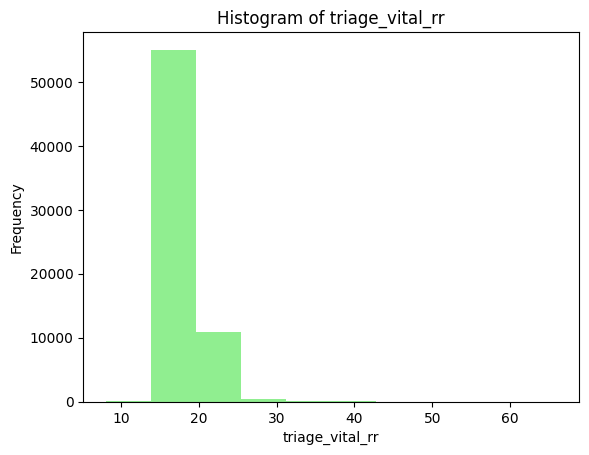

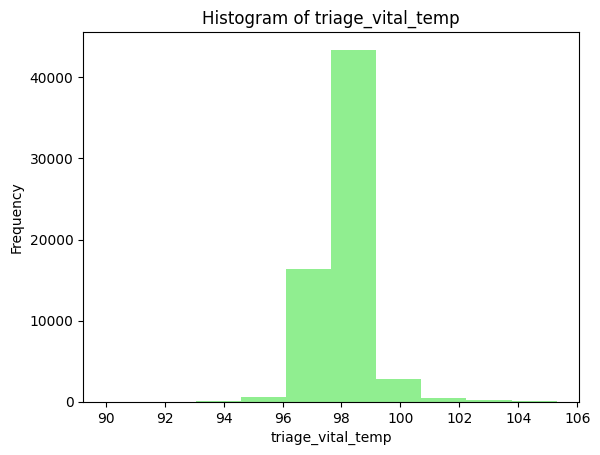

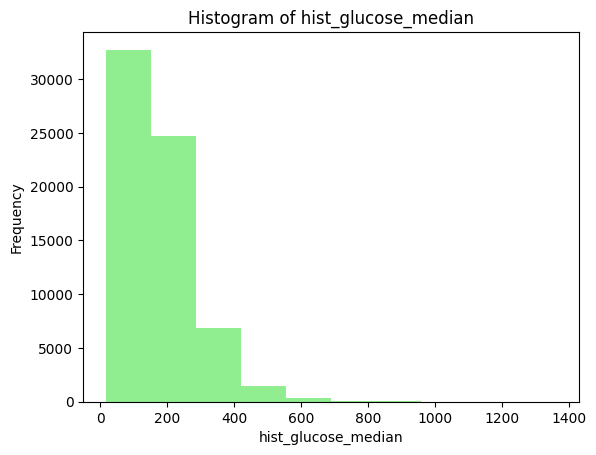

In [474]:
variables = ['triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp',
       'triage_vital_rr', 'triage_vital_temp', 'hist_glucose_median']

for variable in variables:
    plt.figure()  # Create a new figure for each variable
    variable_data = health_data[variable].dropna()  # Remove rows with null values
    plt.hist(variable_data, bins=10, color='lightgreen')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {variable}')
    plt.show()  # Show the histogram for each variable
    

Now that we have checked that the data  is relatively normally distributed (there are some skewed data sets here and there). Lets group them according to age bin and find the average of the `triage vitals` and `hist_glucose_median`

In [475]:
# Calculate the mean for the specified columns by age group
means_by_age_group = health_data.groupby('demo_age')[variables].mean()
round(means_by_age_group,2)

/var/folders/r2/n2zrfqws7k10x13yrtdkp3j40000gn/T/ipykernel_42626/589433489.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_by_age_group = health_data.groupby('demo_age')[variables].mean()


,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_temp,hist_glucose_median
demo_age,,,,,,
18-29,94.56,130.48,81.19,17.62,98.13,202.39
30-39,93.50,133.73,84.49,17.66,98.10,202.75
40-49,89.67,137.89,85.16,17.77,98.09,195.32
50-59,87.55,138.73,83.22,17.80,98.06,189.53
60-69,84.49,140.32,79.28,17.86,98.06,177.28
70-79,82.32,141.54,75.65,17.91,98.02,172.20
80-89,79.66,141.72,73.42,17.96,97.98,166.57
90-99,78.96,142.22,72.17,17.89,97.96,163.20
100-109,78.15,136.42,74.29,17.69,97.90,155.78


----
Before we get started, let's look at the total number of missing/null rows in each of these columns. That way we can compare before and after the next step.

In [476]:
health_data[variables].isna().sum()

triage_vital_hr        37851
triage_vital_sbp       38243
triage_vital_dbp       38277
triage_vital_rr        38619
triage_vital_temp      41387
hist_glucose_median    39003
dtype: int64

---
Impute the average values into missing data

Let's create a dataframe for the mean `triage vitals`and `hist_glucose_median` by age bin for imputation 

In [477]:
imputed_values = pd.DataFrame({
    'demo_age': ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109'],
    'triage_vital_hr': [94.56, 93.50, 89.67, 87.55, 84.49, 82.32, 79.66, 78.96, 78.15],
    'triage_vital_sbp': [130.48, 133.73, 137.89, 138.73, 140.32, 141.54, 141.72, 142.22, 136.42],
    'triage_vital_dbp': [81.19, 84.49, 85.16, 83.22, 79.28, 75.65, 73.42, 72.17, 74.29],
    'triage_vital_rr': [17.62, 17.66, 17.77, 17.80, 17.86, 17.91, 17.96, 17.89, 17.69],
    'triage_vital_temp': [98.13, 98.10, 98.09, 98.06, 98.06, 98.02, 97.98, 97.96, 97.90],
    'hist_glucose_median': [202.39, 202.75, 195.32, 189.53, 177.28, 172.20, 166.57, 163.20, 155.78]
})

Let's now merge the imputed values with the health_data dataframe by creating their own column with the designation '_imputed'

In [478]:
# Merge the imputed values into the health_data DataFrame
health_data = pd.merge(health_data, imputed_values, on='demo_age', how='left', suffixes=('', '_imputed'))

In [479]:
# Iterate over the 'triage_vital' columns and create imputation flag columns
for column_name in variables:
    health_data[column_name + '_imputed_flag'] = health_data[column_name].isna().astype(int)

The imputed triage vital columns have been successfully created. Now I will use the imputed values from the columns generated to fill out the null values in the actual columns. 

In [480]:
imputed_columns = ['triage_vital_hr_imputed', 'triage_vital_sbp_imputed', 'triage_vital_dbp_imputed',
                   'triage_vital_rr_imputed', 'triage_vital_temp_imputed', 'hist_glucose_median_imputed']

In [481]:
# Fill missing values in the specified columns with their imputed values
for triage_variables, imputed_col in zip(variables, imputed_columns):
    health_data[triage_variables] = health_data[triage_variables].fillna(health_data[imputed_col])

Let's make sure that all the data has been properly imputed. 

In [482]:
health_data[variables].isna().sum()

triage_vital_hr        0
triage_vital_sbp       0
triage_vital_dbp       0
triage_vital_rr        0
triage_vital_temp      0
hist_glucose_median    0
dtype: int64

As shown, there are now no null values. However, we have all of these extra columns created. 

In [496]:
columns_to_drop = ['triage_vital_hr_imputed', 'triage_vital_sbp_imputed', 'triage_vital_dbp_imputed',
                   'triage_vital_rr_imputed', 'triage_vital_temp_imputed','hist_glucose_median_imputed']

health_data = health_data.drop(columns=columns_to_drop)

---
#### <a id = 'cat'></a> 1.7: Categorizing Columns

When looking at different columns, I want to convert some of the numerical columns into categorical columns. From what I have observed, there is an eventual ceiling for these values. It would be better to sort them into ranges that can be put into certain categories. I will then drop the original columns.

I will group them based on max/min values, but also reference medical information that is widely available. 

In [483]:
columns_of_interest = [
    'triage_vital_hr','triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_rr', 'triage_vital_temp', 'huse_n_edvisits','huse_n_admissions', 'huse_n_surgeries', 'hist_glucose_median'
]

In [484]:
health_data[columns_of_interest].describe()

,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_temp,huse_n_edvisits,huse_n_admissions,huse_n_surgeries,hist_glucose_median
count,105244.000000,105244.000000,105244.000000,105244.000000,105244.000000,105244.000000,105244.000000,105244.000000,105244.000000
mean,85.540171,139.360811,79.656648,17.834467,98.048429,4.893761,1.791551,3.468701,181.985984
std,13.782824,19.255954,12.304628,1.640344,0.632759,10.302990,3.313472,3.105997,77.522534
min,30.000000,51.000000,25.000000,8.000000,90.000000,0.000000,0.000000,0.000000,16.000000
25%,79.000000,131.000000,73.420000,17.770000,97.900000,0.000000,0.000000,1.000000,133.500000
50%,84.490000,140.320000,79.280000,17.910000,98.060000,2.000000,1.000000,3.000000,172.200000
75%,91.000000,143.000000,85.160000,18.000000,98.130000,5.000000,2.000000,5.000000,195.320000
max,237.000000,266.000000,214.000000,66.000000,105.300000,155.000000,46.000000,27.000000,1364.000000


As we can see for the following columns here is the information: 
- triage_vital_hr	
    - ranges from 30 - 237 beats per minute (bmp)
- triage_vital_sbp	
    - ranges from 45 - 266 mmHg for sbp
- triage_vital_dbp	
    - ranges from 25 - 214 mmHg for dbp
- triage_vital_rr	
    - ranges from 8 - 66 breathes per minutes
- triage_vital_temp	
    - ranges from 90 - 105.3 Fahrenheit 
- huse_n_edvisits	
    - ranges from 0 - 155 prior visits
- huse_n_admissions	
    - ranges from 1 - 46 prior admissions to the hospital
- huse_n_surgeries
    - ranges from 0 - 27 prior surgeries at the time of admission 
-hist_glucose_median
    - ranges from 16 - 1364 mg/dL in glucose readings for bloodwork 

I will segment these columns as shown below. These values for the various conditions were pulled from the Mayo Clinic.  

triage_vital_hr (heart rate):
- Normal: 60 - 100 bpm
- Tachycardia (high): >100 bpm
- Bradycardia (low): <60 bpm
- Critical (extreme values): <30 bpm or >160 bpm

triage_vital_sbp (systolic blood pressure):
- Normal: 90 - 120 mmHg
- Hypotension (low): <90 mmHg
- Pre-hypertension: 120 - 140 mmHg
- Hypertension (high): >140 mmHg
- Critical (extreme values): <70 mmHg or >180 mmHg

triage_vital_dbp (diastolic blood pressure):
- Normal: 60 - 80 mmHg
- Hypotension (low): <60 mmHg
- Pre-hypertension: 80 - 90 mmHg
- Hypertension (high): >90 mmHg
- Critical (extreme values): <40 mmHg or >120 mmHg

triage_vital_rr (respiratory rate):
- Normal: 12 - 20 breaths per minute
- Tachypnea (high): >20 breaths per minute
- Bradypnea (low): <12 breaths per minute
- Critical (extreme values): <8 breaths per minute or >30 breaths per minute

triage_vital_temp (temperature):
- Normal body temperature: 97 - 99.5 degrees Fahrenheit
- Hypothermia (low): <97 degrees Fahrenheit
- Fever (high): >99.5 degrees Fahrenheit
- Critical (extreme values): <90 degrees Fahrenheit or >106 degrees Fahrenheit

huse_n_edvisits (prior hospital visits):
- No prior visits: 0
- Low prior visits: 1 - 10
- Moderate prior visits: 11 - 50
- High prior visits: >50

huse_n_admissions (prior hospital admissions):
- Low prior admissions: 1 - 10
- Moderate prior admissions: 11 - 20
- High prior admissions: 21 - 30
- Very high prior admissions: >30

huse_n_surgeries (prior surgeries):
- No prior surgeries: 0
- Low prior surgeries: 1 - 10
- Moderate prior surgeries: 11 - 20
- High prior surgeries: >20

hist_glucose_median
- "Normal" if <= 200 mg/dL
- ">200(high)" if > 200 and <= 300 mg/dL
- ">300(very high)" if > 300 mg/dL
- **for this data, we will be following the guide put forth by Raza


Let's start with replacing the numeric values in the columns with the above values. We will refer back to this replacement to understand what the true values are. 

In [485]:
# Define a function to classify heart rate
def classify_heart_rate(value):
    if value >= 30 and value <= 160:
        if value >= 60 and value <= 100:
            return 'normal_hr'
        elif value > 100:
            return 'tachycardia(high)_hr'
        else:
            return 'bradycardia(low)_hr'
    else:
        return 'critical_hr'
# Apply the classification function to the DataFrame
health_data['triage_vital_hr'] = health_data['triage_vital_hr'].apply(classify_heart_rate)

#Let's Make sure it worked properly
health_data['triage_vital_hr'].value_counts()

triage_vital_hr
normal_hr               90425
tachycardia(high)_hr    12311
bradycardia(low)_hr      2465
critical_hr                43
Name: count, dtype: int64

In [486]:
# Define a function to classify systolic blood pressure
def classify_systolic_sbp(value):
    if value >= 70 and value <= 180:
        if value >= 90 and value <= 120:
            return 'normal_sbp'
        elif value < 90:
            return 'hypotension(low)_sbp'
        elif value <= 140:
            return 'pre-hypertension_sbp'
        elif value <= 180:
            return 'hypertension(high)_sbp'
    else:
        return 'critical_sbp'

# Apply the classification function to the DataFrame
health_data['triage_vital_sbp'] = health_data['triage_vital_sbp'].apply(classify_systolic_sbp)

#Let's Make sure it worked properly
health_data['triage_vital_sbp'].value_counts()

triage_vital_sbp
hypertension(high)_sbp    51012
pre-hypertension_sbp      35637
normal_sbp                14216
critical_sbp               3750
hypotension(low)_sbp        629
Name: count, dtype: int64

In [487]:
# Define a function to classify diastolic blood pressure
def classify_diastolic_dbp(value):
    if value >= 40 and value <= 120:
        if value >= 60 and value <= 80:
            return 'normal_dbp'
        elif value < 60:
            return 'hypotension(low)_dbp'
        elif value <= 90:
            return 'pre-hypertension_dbp'
        elif value <= 120:
            return 'hypertension(high)_dbp'
    else:
        return 'critical_dpb'

# Apply the classification function to the DataFrame
health_data['triage_vital_dbp'] = health_data['triage_vital_dbp'].apply(classify_diastolic_dbp)

#Let's Make sure it worked properly
health_data['triage_vital_dbp'].value_counts()

triage_vital_dbp
normal_dbp                54598
pre-hypertension_dbp      30421
hypertension(high)_dbp    14593
hypotension(low)_dbp       4848
critical_dpb                784
Name: count, dtype: int64

In [488]:
# Define a function to classify respiratory rate
def classify_respiratory_rate(value):
    if value >= 8 and value <= 30:
        if value >= 12 and value <= 20:
            return 'normal_rr'
        elif value > 20:
            return 'tachypnea(high)_rr'
        else:
            return 'bradypnea(low)_rr'
    else:
        return 'Critical_rr'
    
# Apply the classification function to the DataFrame
health_data['triage_vital_rr'] = health_data['triage_vital_rr'].apply(classify_respiratory_rate)

#Let's Make sure it worked properly
health_data['triage_vital_rr'].value_counts()

triage_vital_rr
normal_rr             102457
tachypnea(high)_rr      2616
Critical_rr              145
bradypnea(low)_rr         26
Name: count, dtype: int64

In [489]:
# Define a function to classify body temperature
def classify_temperature(value):
    if value >= 90 and value <= 106:
        if value >= 97 and value <= 99.5:
            return 'normal_temp'
        elif value < 97:
            return 'hypothermia(low)_temp'
        elif value > 99.5:
            return 'fever(high_temp)'
    else:
        return 'critical_temp'

# Apply the classification function to the DataFrame
health_data['triage_vital_temp'] = health_data['triage_vital_temp'].apply(classify_temperature)


#Let's Make sure it worked properly
health_data['triage_vital_temp'].value_counts()

triage_vital_temp
normal_temp              100171
hypothermia(low)_temp      2960
fever(high_temp)           2113
Name: count, dtype: int64

In [490]:
# Define a function to classify prior hospital visits
def classify_prior_visits(value):
    if value == 0:
        return 'no_prior_visits'
    elif value >= 1 and value <= 10:
        return 'low_prior_visit'
    elif value >= 11 and value <= 50:
        return 'moderate_prior_visit'
    else:
        return 'high_prior_visit'

health_data['huse_n_edvisits'] = health_data['huse_n_edvisits'].apply(classify_prior_visits)

#Let's Make sure it worked properly
health_data['huse_n_edvisits'].value_counts()



huse_n_edvisits
low_prior_visit         66405
no_prior_visits         27346
moderate_prior_visit    10424
high_prior_visit         1069
Name: count, dtype: int64

In [491]:

# Define a function to classify prior hospital admissions
def classify_prior_admissions(value):
    if value == 0:
        return 'No_prior_admis'
    elif value >= 1 and value <= 10:
        return 'low_prior_admis'
    elif value >= 11 and value <= 20:
        return 'moderate_prior_admis'
    elif value >= 21 and value <= 30:
        return 'high_prior_admis'
    else:
        return 'vhigh_prior_admis'

health_data['huse_n_admissions'] = health_data['huse_n_admissions'].apply(classify_prior_admissions)

#Let's Make sure it worked properly
health_data['huse_n_admissions'].value_counts()

huse_n_admissions
low_prior_admis         51863
No_prior_admis          50511
moderate_prior_admis     2445
high_prior_admis          280
vhigh_prior_admis         145
Name: count, dtype: int64

In [492]:
# Define a function to classify prior surgeries
def classify_prior_surgeries(value):
    if value == 0:
        return 'no_prior_surg'
    elif value >= 1 and value <= 10:
        return 'low_Surg'
    elif value >= 11 and value <= 20:
        return 'moderate_Surg'
    else:
        return 'high_Surg'

health_data['huse_n_surgeries'] = health_data['huse_n_surgeries'].apply(classify_prior_surgeries)

#Let's Make sure it worked properly
health_data['huse_n_surgeries'].value_counts()

huse_n_surgeries
low_Surg         86846
no_prior_surg    14805
moderate_Surg     3534
high_Surg           59
Name: count, dtype: int64

In [493]:
# Function to categorize blood glucose levels
def categorize_blood_glucose(glucose_level):
    if glucose_level < 200:
        return 'Normal'
    elif glucose_level <= 300:
        return '>200(high)'
    else:
        return '>300(very high)'

health_data['hist_glucose_median'] = health_data['hist_glucose_median'].apply(categorize_blood_glucose)

#Let's Make sure it worked properly
health_data['hist_glucose_median'].value_counts()

hist_glucose_median
Normal             81052
>200(high)         16644
>300(very high)     7548
Name: count, dtype: int64

This will make it easier to understand the distribution of these values in a meaningful way while also pre-processing these columns for future one-hot encoding and modelling. 

---
### <a id = 'conc'></a> Conclusion

In [501]:
health_data.shape

(105244, 539)

After cleaning, we are left with 539 columns and 105,244 rows. There is still a sizeable data set left over. We will now export the clean data as it's own csv to be used for further eda. 

In [502]:
clean_health_data = health_data

In [503]:
clean_health_data.to_csv('clean_health_data.csv', index=False) 

---